# assignment10 20124602
# https://github.com/antivec/assignment10

# import libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# read mnist datas for file

In [4]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()


In [5]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# normalize the values of the input data to be [0, 1]

In [6]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


# distance function between two vectors x and y

In [7]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# make a matrix each column of which represents an images in a vector form 

In [8]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

# save mnist training data in the list

In [9]:
count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

In [10]:
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

In [11]:
im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

In [12]:
for i in range(num_train):
    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

In [13]:
f4 = plt.figure(4)
im_test_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_test_count    = np.zeros(10, dtype=int)

<Figure size 432x288 with 0 Axes>

In [14]:
for i in range(num_test):
    im_test_average[:, list_label_test[i]] += list_image_test[:, i]
    im_test_count[list_label_test[i]] += 1

# Define Model parameter
\begin{equation*}
\ {\theta} = (\theta_1,\theta_2,....,\theta_n)
\end{equation*}

In [15]:
x = np.linspace(0,9,7840)
train_arr = im_average.reshape(7840,1)
y = np.empty(7840,dtype = float)
for i in range(np.size(train_arr)):
    y[i] = train_arr[i]

In [45]:
Model_parameter = np.polyfit(x,y,0)
p1 = np.poly1d(Model_parameter)
f = np.polyval(p1,x)
LeastFitError = np.sum(y-f)
for p in range(10):
    pf = np.polyfit(x,y,p)
    p1 = np.poly1d(pf)
    f = np.polyval(p1,x)
    tmpError = np.sum(y-f)
    if(LeastFitError > tmpError):
        LeastFitError = tmpError
        Model_parameter = np.polyfit(x,y,p)
    else:
        pass

In [46]:
print(LeastFitError)
print(Model_parameter)    

-5.827889253851026e-05
[ 1.85864254e-02 -7.76154149e-01  1.36439183e+01 -1.30321152e+02
  7.26128300e+02 -2.34242516e+03  4.02022855e+03 -2.90786593e+03
  6.91775649e+02 -2.35518104e+01]


# expected non-0 turned out to be non-0 -> TN
#   (-) & (-)

# expected 0 turned out to be 0 -> TP
#   (+) & (+)

# expected 0 turned out to be non-0 -> FP
#   (+) & (-)

# expected non-0 turned out to be 0 -> FN
#   (-) & (+)

# use training mnist-data to classify from 0 ~ 9

In [20]:
list_label_count = np.empty(10, dtype=int)
for label in range(10):
    count = 0
    for i in range(num_train):
        if(list_label_train[i] == label):
             count += 1
    list_label_count.put(label,count)



In [21]:
list_classified_image0_train= np.empty((size_row * size_col, list_label_count[0]), dtype=float)
list_classified_label0_train= np.empty(list_label_count[0],dtype=int)

list_classified_image1_train= np.empty((size_row * size_col, list_label_count[1]), dtype=float)
list_classified_label1_train= np.empty(list_label_count[1],dtype=int)

list_classified_image2_train= np.empty((size_row * size_col, list_label_count[2]), dtype=float)
list_classified_label2_train= np.empty(list_label_count[2],dtype=int)

list_classified_image3_train= np.empty((size_row * size_col, list_label_count[3]), dtype=float)
list_classified_label3_train= np.empty(list_label_count[3],dtype=int)

list_classified_image4_train= np.empty((size_row * size_col, list_label_count[4]), dtype=float)
list_classified_label4_train= np.empty(list_label_count[4],dtype=int)

list_classified_image5_train= np.empty((size_row * size_col, list_label_count[5]), dtype=float)
list_classified_label5_train= np.empty(list_label_count[5],dtype=int)

list_classified_image6_train= np.empty((size_row * size_col, list_label_count[6]), dtype=float)
list_classified_label6_train= np.empty(list_label_count[6],dtype=int)

list_classified_image7_train= np.empty((size_row * size_col, list_label_count[7]), dtype=float)
list_classified_label7_train= np.empty(list_label_count[7],dtype=int)

list_classified_image8_train= np.empty((size_row * size_col, list_label_count[8]) ,dtype=float)
list_classified_label8_train= np.empty(list_label_count[8],dtype=int)

list_classified_image9_train= np.empty((size_row * size_col, list_label_count[9]), dtype=float)
list_classified_label9_train= np.empty(list_label_count[9],dtype=int)

In [22]:
count = 0
for i in range(num_train):
    if(list_label_train[i] == 0):           
        list_classified_label0_train.put(count,list_label_train[i])
        list_classified_image0_train[:,count] = list_image_train[:,i]
        count += 1
        
count = 0    
for i in range(num_train):
    if(list_label_train[i] == 1):           
        list_classified_label1_train.put(count, list_label_train[i] )
        list_classified_image1_train[:,count] = list_image_train[:,i]
        count += 1

count = 0
for i in range(num_train):
    if(list_label_train[i] == 2) :         
        list_classified_label2_train.put(count, list_label_train[i])
        list_classified_image2_train[:,count] = list_image_train[:,i]
        count += 1

count = 0
for i in range(num_train):
    count = 0
    if(list_label_train[i] == 3):           
        list_classified_label3_train.put(count, list_label_train[i] )
        list_classified_image3_train[:,count] = list_image_train[:,i]
        count += 1

count = 0
for i in range(num_train):
    count = 0
    if(list_label_train[i] == 4):           
        list_classified_label4_train.put(count, list_label_train[i] )
        list_classified_image4_train[:,count] = list_image_train[:,i]
        count += 1
        
count = 0
for i in range(num_train):
    count = 0
    if(list_label_train[i] == 5):           
        list_classified_label5_train.put(count, list_label_train[i])
        list_classified_image5_train[:,count] = list_image_train[:,i]
        count += 1
        
count = 0
for i in range(num_train):
    count = 0
    if(list_label_train[i] == 6):           
        list_classified_label6_train.put(count, list_label_train[i] )
        list_classified_image6_train[:,count] = list_image_train[:,i]
        count += 1
        
count = 0
for i in range(num_train):
    count = 0
    if(list_label_train[i] == 7):           
        list_classified_label7_train.put(count, list_label_train[i] )
        list_classified_image7_train[:,count] = list_image_train[:,i]
        count += 1
        
count = 0
for i in range(num_train):
    count = 0
    if(list_label_train[i] == 8):           
        list_classified_label8_train.put(count, list_label_train[i] )
        list_classified_image8_train[:,count] = list_image_train[:,i]
        count += 1
        
count = 0
for i in range(num_train):
    count = 0
    if(list_label_train[i] == 9):           
        list_classified_label9_train.put(count, list_label_train[i] )
        list_classified_image9_train[:,count] = list_image_train[:,i]
        count += 1

# Test sample whether classified ok

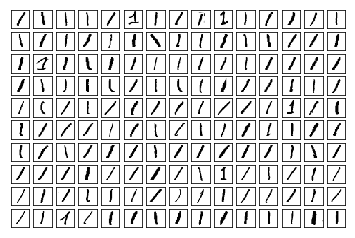

In [23]:
for i in range(150):
        classified_label = list_classified_label1_train[i]
        classified_im_vector= list_classified_image1_train[:,i]
        classified_im_matrix = classified_im_vector.reshape((size_row, size_col))

        plt.subplot(10, 15, i+1)
       # plt.title(positive_label)
        plt.imshow(classified_im_matrix, cmap='Greys', interpolation='None')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

# generate random vector data
\begin{equation*}
\ r_{i} \sim N(0,{\delta}),
\ {\delta} = 1
\end{equation*}

In [24]:
random_v = np.random.normal(0,1,784)

# Feature function
# random_mul =
\begin{equation*}
\ f(x) = { r^T_{i}}  {x}
\end{equation*}

In [31]:
random_mul    = np.empty((size_row * size_col), dtype=float)
random_mul = random_v.transpose() * im_average0


In [32]:
list_label_average = np.zeros(((size_row * size_col),10),dtype =float)

im_average0  = np.zeros((size_row * size_col), dtype=float)
for i in range(list_label_count[0]):
    im_average0 += list_classified_image0_train[:, i]
im_average0 /= list_label_count[0]

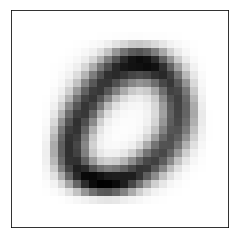

In [33]:
positive_im_vector   = im_average0
positive_im_matrix   = positive_im_vector.reshape((size_row, size_col))
# plt.title(positive_label)
plt.imshow(positive_im_matrix, cmap='Greys', interpolation='None')

frame   = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Partition function
\begin{equation*}
\tilde{f_n(x;\theta)}  = \theta_{1}f_{1}(x) + ... +\theta_{n}f_{n}(x)
\end{equation*}

# Classifier 
\begin{equation*}
\hat{f(x)}  = argmax_n(\tilde{f_n(x)})
\end{equation*}